# Polynomial Regression

Instead of fitting straight lines, we're fitting polynomials. In this case, the equation is as follows: $$y=b_{0}+b_{1}x_{1}+b_{2}x_{1}^{2}+...+b_{n}x_{1}^{n}$$

Here you're using one variable but with multiple powers. 

Want to find a salary for a new employee with previous 20 years experience. New employee is a regional manager and says they're on 160k at their previous job.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

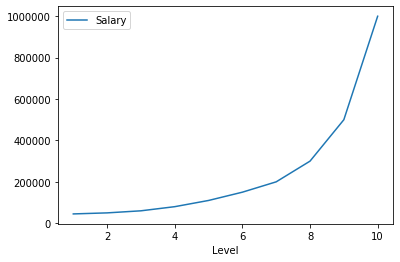

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.plot(x='Level', y='Salary');

In [4]:
dataset
#new employee is said to be level 6.5

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
# split data into matrix of features (X) and independent vector (y)
X = dataset.iloc[:,1:2].values #need to make sure this is a matrix not a vector
y = dataset.iloc[:,2].values

#important to note X is a matrix of features (i.e. multidimensional) and y is a vector (i.e 1D)
X.shape, y.shape

((10, 1), (10,))

In [6]:
# not enough data to split into test and train
# fit a linear regression to dataset for comparison purposes
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
#fit a polynomial regression to dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
#make new matrix of feature with 2 degrees
X_poly = poly_reg.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In this new matrix. The first column is constant $b_{0}$. The second column is original values and the third is the square of those values.

In [8]:
#new linear regression object fitted to new poly matrix 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

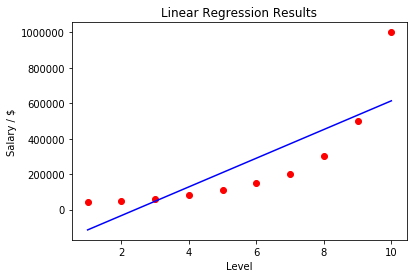

In [9]:
# visualise the linear regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary / $');

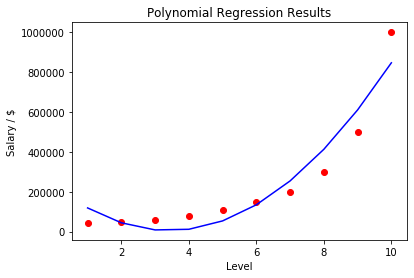

In [10]:
# visualise the polynomial regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg2.predict(X_poly), color='blue')
plt.title('Polynomial Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary / $');

The linear regression model is really bad.

The polynomial regression model is better, but still not great! 

Lets add another degree, see what happens.

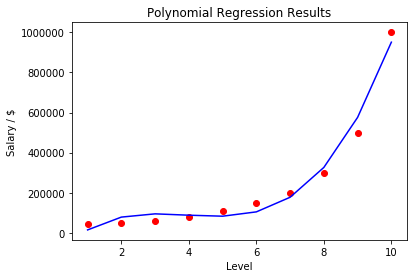

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree=3)
X_poly = poly_reg2.fit_transform(X)
lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly, y)

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg3.predict(X_poly), color='blue')
plt.title('Polynomial Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary / $');

Even better...what about four degrees?

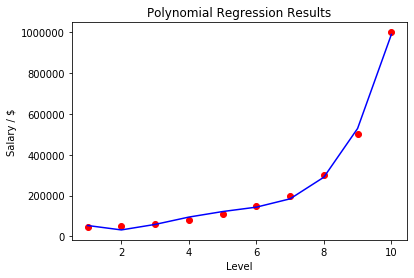

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg3 = PolynomialFeatures(degree=4)
X_poly = poly_reg3.fit_transform(X)
lin_reg4 = LinearRegression()
lin_reg4.fit(X_poly, y)

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg4.predict(X_poly), color='blue')
plt.title('Polynomial Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary / $');

Getting better...what about a better resolution on the x axis?

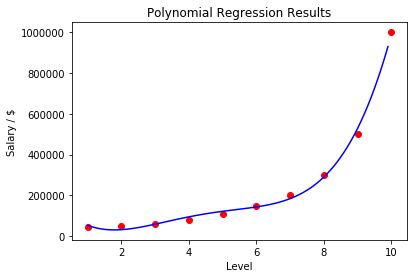

In [13]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg4.predict(poly_reg3.fit_transform(X_grid)), color='blue')
plt.title('Polynomial Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary / $');

In [16]:
# comparing models empirically
print(lin_reg.predict(X=6.5))
print(lin_reg2.predict(poly_reg.fit_transform(6.5)))
print(lin_reg3.predict(poly_reg2.fit_transform(6.5)))
print(lin_reg4.predict(poly_reg3.fit_transform(6.5)))

[330378.78787879]
[189498.10606061]
[133259.46969697]
[158862.45265153]


We can tell from the last model the employee was telling the truth about his previous salary!